In [10]:
from src.class_polygon import Polygon
from src.smth2matrix.shift2zero import shift2zero
import numpy as np
from src.greedy_alg.class_pallets import Pallets
from src.class_item import Item

import copy
import math
import random

from src.class_packing import Packing
from src.smth2lines.polygon2segments import polygon2segments

h = 1

# width= 5752
# height = 10000

width = 79
height = 600

# width = 40
# height = 80

# num_rot=4
# num_sort=2
eps=0.0

"""Входные данные типа swim.txt (trousers.txt)"""
# ------------  чтение файла  ------------
# path = 'shirts.txt'
# path = 'swim.txt'
path = 'trousers.txt'
# path = "src\\input\\" + input_file_name
f = open(path, 'r')
line = f.readline()
polygons = []
while line:
    f.readline()  #QUANTITY
    quantity = int(f.readline().split(' ')[0][:-1])
    f.readline()  #NUMBER OF VERTICES
    num_verties = int(f.readline().split(' ')[0][:-1])
    f.readline()  #VERTICES (X,Y)
    polygon = []
    for _ in range(num_verties):
        line = f.readline()
        list_point = (''.join([
            line[i] for i in range(len(line) - 1)
            if not ((line[i] == ' ') and (line[i + 1] == ' '))
        ])).split(' ')
        point = [float(list_point[-2]), float(list_point[-1])]
        polygon.append(copy.deepcopy(point))
    for _ in range(quantity):
        polygons.append(copy.deepcopy(polygon))

    f.readline()  #
    line = f.readline()  #PIECE k
f.close()


# h = 3
#
# width = 100
# height = 200
#
# path = 'concave30/test12.txt'
# f = open(path, 'r')
# num_items = int(f.readline())
# polygons = np.full(num_items, None)
# list_pallet_shape = f.readline().split(' ')
# for i in range(num_items):
#     list_points = f.readline().split(' ')
#     points = []
#     for j in range(0, len(list_points) - 1, 2):
#         point = [float(list_points[j]), float(list_points[j + 1])]
#         points.append(point)
#     if (points[0][0] == points[-1][0] and points[0][1] == points[-1][1]):
#         points.pop()
#     polygons[i] = np.array(points)
# f.close()


packing = Packing(width=width, height=height, drill_radius=0)

packing.polygons = copy.deepcopy(polygons)
packing.num_items = len(polygons)

pallets = Pallets([width, height])
pallets.grid_step = h
pallets.add_pallet_lines()

print(pallets.pallet_lines)

[[[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]], [[0, 0], [79, 79]],

In [11]:
packing.items = np.full(len(polygons), None)

for id in range(len(polygons)):

    rotated_points = copy.deepcopy(polygons[id])
    new_points = Polygon(rotated_points)
    new_points.rotate(3*math.pi/2)
    new_points.move_to_origin()
    points1 = new_points.points_to_list()

    item = Item(id, copy.deepcopy(points1))
    packing.items[id] = copy.deepcopy(item)
    packing.items[id].rotation = 0

    # item = Item(id, polygons[id])
    # packing.items[id] = item
    # item.rotation = 0

packing.pallets = pallets
packing.h = h
packing.add_segments_for_items()

In [12]:
packing.set_squares()
packing.sort_items(num_sort=2)

In [13]:
# gravity_center_x = 0
# gravity_center_y = 0
# item_weight = 0
# j = 0
# for line in packing.items[4].segments[0]:
#     print('line num', j)
#     centers_sum = 0
#     line_weight = 0
#     i = 0
#     while i < len(line):
#         print('point: ', line[i][0] + (line[i][1] - line[i][0])/2)
#         print('weight: ', line[i][1] - line[i][0])
#         centers_sum+= (line[i][0] + (line[i][1] - line[i][0])/2) * (line[i][1] - line[i][0])
#         line_weight += line[i][1] - line[i][0]
#         i += 1
#     gravity_center_x += centers_sum
#     gravity_center_y += (j*packing.h) * line_weight
#     item_weight += line_weight
#     print(centers_sum / line_weight)
#     j += 1
#
# center_x = gravity_center_x / item_weight
# center_y = gravity_center_y / item_weight
# print('x: ', center_x)
# print('y: ',center_y)



In [14]:
# for item in packing.items:
    # item.set_item_gravity_centers(packing.h)
    # print(item.segment_gravity_center_x)

# from matplotlib import pyplot as plt, patches
#
#
# fig, ax = plt.subplots()
#
# ax.set_xlim(-0.5, 30 + 2)
# ax.set_ylim(-0.5, 30 + 2)
#
# for i in range(len(packing.items[4].segments[0])):
#     plt.plot([0, width], [i*h, i*h], color = 'black', linestyle=':')
#
# figure = patches.Polygon(packing.items[4].points,
#                             linewidth=1,
#                             edgecolor='red',
#                             fill=False)
# ax.add_patch(figure)
#
# for i in range(len(packing.items[4].segments[0])):
#     for sigment in packing.items[4].segments[0][i]:
#         if sigment[0] != sigment[1]:
#             plt.plot(sigment, [i*h, i*h], color = 'blue')
#         else:
#             ax.scatter(sigment[0], i*h, color = 'blue', s = 4)
#
# ax.scatter(center_x, center_y, color = 'red', s = 6)
#
# plt.savefig('sigments_with_gravity_center_2.png')
# plt.show()

In [15]:
import time


# from copy import deepcopy


def pack_item(item, pallets, t_vector, r, best_rotation):
    item.t_vector = [t_vector, r]
    item.packed = True
    item.best_rotation = best_rotation
    for s in range(len(item.segments[best_rotation])-1):
        for l in range(len(item.segments[best_rotation][s])):
            new_line = [copy.deepcopy(item.segments[best_rotation][s][l][0]) + copy.deepcopy(item.t_vector[0]), copy.deepcopy(item.segments[best_rotation][s][l][1]) + copy.deepcopy(item.t_vector[0])]
            pallets.pallet_lines[r+s].append(copy.deepcopy(new_line))
        pallets.pallet_lines[r+s].sort(key=lambda x: int(x[0]), reverse=False)

    def first_elem(e):
      return e[0]

    for line in pallets.pallet_lines:
        for segment in line:
            segment.sort()
        line.sort(key=first_elem)
        i = 0
        while i < (len(line) - 1):
            if line[i][1] == line[i+1][0]:
                line[i][1] = line[i+1][1]
                line.pop(i+1)
                continue
            # if line[i][1] > line[i+1][0]:
            #     if line[i][1] < line[i+1][1]:
            #         line[i][1] = line[i+1][1]
            #         line.pop(i+1)
            #         continue
            #     elif line[i][1] >= line[i+1][1]:
            #         line.pop(i+1)
            #         continue
            i+=1

def pack_segments(items, pallets):
    for item in items:
        if item.packed is False:
            best_height = 10000 # конечно не 10000, надо написать сколько
            best_t_vector = None
            best_rotation = None
            best_r = None
            for rotation in range(item.rotation + 1):
                segments = copy.deepcopy(item.segments[rotation])
                r = 0
                finish_flag = 0
                while r < len(pallets.pallet_lines) and finish_flag == 0:
                    row = pallets.pallet_lines[r]
                    ex_flag = 0
                    t_vector = row[0][1] - segments[0][0][0]
                    i = 0
                    while i < len(segments) and r + i < len(pallets.pallet_lines) and ex_flag == 0:
                            j = 0
                            while j < len(segments[i]) and ex_flag == 0:
                                m = 0
                                while m < len(pallets.pallet_lines[r+i]) and ex_flag == 0:
                                    # случаи пересечения линии и упаковки
                                    if segments[i][j][1] + t_vector > pallets.shape[0]:
                                        ex_flag = 1
                                        i = -1
                                        j = 0
                                    elif pallets.pallet_lines[r+i][m][0] == segments[i][j][0] + t_vector == segments[i][j][1] + t_vector or \
                                        pallets.pallet_lines[r+i][m][1] == segments[i][j][0] + t_vector == segments[i][j][1] + t_vector:
                                        pass
                                    elif pallets.pallet_lines[r+i][m][0] <= segments[i][j][0] + t_vector + 0.0000000000001 < pallets.pallet_lines[r+i][m][1]:
                                        t_vector = t_vector + pallets.pallet_lines[r+i][m][1] - (segments[i][j][0] + t_vector)
                                        i = -1
                                        j = 0
                                    elif pallets.pallet_lines[r+i][m][0] < segments[i][j][1] + t_vector + 0.0000000000001 <= pallets.pallet_lines[r+i][m][1]:
                                        t_vector = t_vector + pallets.pallet_lines[r+i][m][1] - (segments[i][j][0] + t_vector)
                                        i = -1
                                        j = 0
                                    elif segments[i][j][0] + t_vector < pallets.pallet_lines[r + i][m][0]  and \
                                            pallets.pallet_lines[r + i][m][1]  < segments[i][j][1] + t_vector:
                                        t_vector = pallets.pallet_lines[r+i][m][1] - segments[i][j][0]
                                        i = -1
                                        j = 0
                                    elif segments[i][j][0] + t_vector < 0:
                                        t_vector = -segments[i][j][0]
                                        i = -1
                                        j = 0
                                    elif (pallets.pallet_lines[r+i][m][0] == segments[i][j][0] + t_vector or segments[i][j][1] + t_vector == pallets.pallet_lines[r+i][m][1]) and pallets.pallet_lines[r+i][m][0] != pallets.pallet_lines[r+i][m][1]:
                                        # print(item.id)
                                        t_vector = pallets.pallet_lines[r+i][m][1] - segments[i][j][0]
                                        i = -1
                                        j = 0

                                    m += 1
                                j += 1
                            i += 1
                    # если объект влезает, сохраняем его координаты
                    if ex_flag == 0:
                        if best_height > r :
                            best_height = copy.deepcopy(r)
                            best_r = copy.deepcopy(r)
                            best_t_vector = copy.deepcopy(t_vector)
                            best_rotation = copy.deepcopy(rotation)
                        finish_flag = 1
                    r += 1
            pack_item(item, pallets, best_t_vector, best_r, best_rotation)

start_time = time.time()
# pack_segments(packing.items, packing.pallets)
print(time.time() - start_time)

0.0


In [16]:
# for item in packing.items:
#     print(item.id, '---', item.t_vector)
#
# print(packing.pallets.pallet_lines[11])

In [17]:
from math import inf


# def packing_gravity_center(items):
#     pack_gravity_center_x = 0
#     pack_gravity_center_y = 0
#     pack_weight = 0
#     for item in items:
#         if item.packed is True:
#             pack_gravity_center_x += (item.segment_gravity_center_x + item.t_vector[0]) * item.segment_square
#             pack_gravity_center_y += (item.segment_gravity_center_y + item.t_vector[1]) * item.segment_square
#             pack_weight += item.segment_square
#     return pack_gravity_center_x, pack_gravity_center_y, pack_weight

def ff_pack_segments(items, pallets):

    a = 1
    b = 1
    c = 1.7
    d = 1.7
    e = 1

    # window_size = random.randint(4, 8)
    extra_window = 0
    r = 0
    pack_counter = 0
    packing_height = 0
    pack_gravity_center_x, pack_gravity_center_y, pack_weight = 0, 0, 0
    while r < len(pallets.pallet_lines):
    # while r < 1:
        row = pallets.pallet_lines[r]
        while row!= [[0, width]] and pack_counter < len(items):
            fitness_func = inf
            fit_counter = 0
            # best_height = len(pallets.pallet_lines) # конечно не 10000, надо написать сколько
            best_t_vector = None
            best_rotation = None
            best_r = None
            best_item = None
            # print('----')
            # for item in items:
            k = 0
            if extra_window == 1:
                window_size = window_size*2
            elif pack_counter < 10:
                window_size = random.randint(4, 8)
            else:
                window_size = random.randint(4, 8) + (pack_counter-10)
            window_counter = 0
            while k < len(items) and window_counter < window_size:
                item = items[k]
                if item.packed is False:
                    window_counter += 1
                    # print(item.id)
                    for rotation in range(item.rotation + 1):
                        item_height = 0
                        finish_flag = 0
                        segments = copy.deepcopy(item.segments[rotation])
                        # print(segments[rotation][0])
                        # print('r', r, '---', pallets.pallet_lines[r])
                        if segments[0][0][1] - segments[0][0][0] > pallets.pallet_lines[r][1][0] - pallets.pallet_lines[r][0][1]:
                            continue
                        t_vector = pallets.pallet_lines[r][0][1] - segments[0][0][0]
                        i = 0
                        while i < len(segments) and r + i < len(pallets.pallet_lines) and finish_flag != 1:
                                j = 0
                                while j < len(segments[i]) and finish_flag != 1:
                                    if i == 0 and j == 0:
                                        if segments[0][0][1] + t_vector >  pallets.pallet_lines[r][1][0]:
                                            finish_flag = 1
                                            # print('finish_flag = 1 1')
                                    m = 0
                                    while m < len(pallets.pallet_lines[r+i]) and finish_flag != 1:
                                        # случаи пересечения линии и упаковки
                                        if segments[i][j][1] + t_vector > pallets.shape[0]:
                                            i = -1
                                            j = 0
                                            finish_flag = 1
                                            # print('finish_flag = 1 2')
                                        elif pallets.pallet_lines[r+i][m][0] == segments[i][j][0] + t_vector == segments[i][j][1] + t_vector or \
                                            pallets.pallet_lines[r+i][m][1] == segments[i][j][0] + t_vector == segments[i][j][1] + t_vector:
                                            pass
                                        elif pallets.pallet_lines[r+i][m][0] <= segments[i][j][0] + t_vector + 0.0000000000001 < pallets.pallet_lines[r+i][m][1]:
                                            t_vector = t_vector + pallets.pallet_lines[r+i][m][1] - (segments[i][j][0] + t_vector)
                                            i = -1
                                            j = 0
                                        elif pallets.pallet_lines[r+i][m][0] < segments[i][j][1] + t_vector + 0.0000000000001 <= pallets.pallet_lines[r+i][m][1]:
                                            t_vector = t_vector + pallets.pallet_lines[r+i][m][1] - (segments[i][j][0] + t_vector)
                                            i = -1
                                            j = 0
                                        elif segments[i][j][0] + t_vector < pallets.pallet_lines[r + i][m][0]  and \
                                                pallets.pallet_lines[r + i][m][1]  < segments[i][j][1] + t_vector:
                                            t_vector = pallets.pallet_lines[r+i][m][1] - segments[i][j][0]
                                            i = -1
                                            j = 0
                                        elif segments[i][j][0] + t_vector < 0:
                                            t_vector = -segments[i][j][0]
                                            i = -1
                                            j = 0
                                        elif (pallets.pallet_lines[r+i][m][0] == segments[i][j][0] + t_vector or segments[i][j][1] + t_vector == pallets.pallet_lines[r+i][m][1]) and pallets.pallet_lines[r+i][m][0] != pallets.pallet_lines[r+i][m][1]:
                                            # print(item.id)
                                            t_vector = pallets.pallet_lines[r+i][m][1] - segments[i][j][0]
                                            i = -1
                                            j = 0
                                        m += 1
                                    j += 1
                                i += 1
                        if finish_flag == 0:
                            if packing_height >= r + len(segments):
                                item_height = packing_height
                            else:
                                item_height = r + len(segments)
                            # item_ff = (pack_gravity_center_x + (item.segment_gravity_center_x[rotation] + t_vector) * item.segment_square[rotation])  / (pack_weight + item.segment_square[rotation])
                            ff_1 = (pack_gravity_center_x + (item.segment_gravity_center_x[rotation] + t_vector) * item.segment_square[rotation])  / (pack_weight + item.segment_square[rotation])
                            ff_2 = (pack_gravity_center_y + (item.segment_gravity_center_y[rotation] + r) * item.segment_square[rotation]) / (pack_weight + item.segment_square[rotation])
                            ff_3 = item.segment_square[rotation]
                            ff_4 = item.segment_square_convex[rotation]
                            ff_5 = item_height

                            item_ff = a*ff_1 + b*ff_2 + c*(-ff_3) + d*(-ff_4) + e*ff_5

                            # print('r: ', r, 'fitness_func: ', item_ff)
                            if item_ff < fitness_func:
                            # if best_height > r + len(segments) :
                                fitness_func = item_ff
                                best_item = item
                                # best_height = copy.deepcopy(r) + len(segments)
                                best_r = copy.deepcopy(r)
                                best_t_vector = copy.deepcopy(t_vector)
                                best_rotation = copy.deepcopy(rotation)
                                packing_height = item_height

                                pack_gravity_center_x += (item.segment_gravity_center_x[rotation] + t_vector) * item.segment_square[rotation]
                                pack_gravity_center_y += (item.segment_gravity_center_y[rotation] + r) * item.segment_square[rotation]
                                pack_weight += item.segment_square[rotation]

                            fit_counter += 1
                k += 1
            if fit_counter != 0:
                # print('best ff', fitness_func)
                # if packing_height < best_height:
                #     packing_height = best_height
                pack_item(best_item, pallets, best_t_vector, best_r, best_rotation)
                pack_counter += 1
                extra_window = 0
            else:
                if window_size <= len(items):
                    extra_window = 1
                else:
                    pallets.pallet_lines[r][0][1] = pallets.pallet_lines[r][1][1]
                    pallets.pallet_lines[r].pop(1)
                    extra_window = 0
        r += 1
    print(packing_height)
    return items, packing_height

start_time = time.time()
# for i in range(5):
# items, packing_height = ff_pack_segments(packing.items, copy.deepcopy(packing.pallets))
print(time.time() - start_time)

0.0


In [18]:
def add_items_in_order(packing, permutation = None):
    if permutation is None:
        permutation = [n for n in range(packing.num_items)]
    # print('======')
    # print(permutation)
    # print('======')
    pack = copy.deepcopy(packing)
    for i in range(packing.num_items):
        num = permutation[i]
        # print('mun', num)
        pack.items[i] = copy.deepcopy(packing.items[num])
    #     print(pack.items[i].id )
    # print('-----')
    return pack

def get_new_permutation_2opt(permutation):
    # получаем новую перестановку
    a = 0
    b = 0
    while a == b or abs(a-b) < 2:
        a = np.random.randint(0, len(pack.items))
        b = np.random.randint(0, len(pack.items))
    print('Пара: ', a, b)
    if a < b:
            start = permutation[0:a]
            mid = permutation[a:b]
            mid.reverse()
            end = permutation[b:]
    else:
        start = permutation[0:b]
        mid = permutation[b:a]
        mid.reverse()
        end = permutation[a:]
    permutation = start + mid + end
    print(permutation)
    return permutation

def get_new_permutation_replace(permutation):
    # получаем новую перестановку
    a = 0
    b = 0
    c = len(pack.items)
    d = len(pack.items)
    while a == b and (a+c > b or b+d > a) and a+c >= len(pack.items) and b+d >= len(pack.items):
        a = np.random.randint(0, len(pack.items))
        b = np.random.randint(0, len(pack.items))
        c = np.random.randint(0, len(pack.items))
        d = np.random.randint(0, len(pack.items))
    print('Отрезки: ', a, a+c, '--', b, b+c)
    if a < b:
            start = permutation[0:a]
            mid1 = permutation[a:a+c]
            mid2 = permutation[a+c:b]
            mid3 = permutation[b:b+d]
            end = permutation[b+d:]
    else:
        start = permutation[0:b]
        mid1 = permutation[b:b+c]
        mid2 = permutation[b+c:a]
        mid3 = permutation[a:a+d]
        end = permutation[a+d:]
    permutation = start + mid3 + mid2 + mid1 + end
    print(permutation)
    return permutation


minPermutation = []
for item in packing.items:
    minPermutation.append(item.id)
print('min perm: ', minPermutation)

# np.random.shuffle(minPermutation)


results = []
successful_iteration = 1
best_items = packing.items
best_result = len(packing.pallets.pallet_lines)
pack = copy.deepcopy(packing)
start_time = time.time()
while successful_iteration == 1:
    successful_iteration = 0
    permutation = minPermutation
    # pack = copy.deepcopy(packing)
    for i in range(1): # сколько смотрим соседей
        print('Сосед номер ', i)
        newPermutation = get_new_permutation_2opt(permutation)
        pack = add_items_in_order(pack, newPermutation)
        for i in range(1): # сколько раз проверяем каждого соседа
            items, packing_height = ff_pack_segments(copy.deepcopy(pack.items), copy.deepcopy(pack.pallets))
            results.append(packing_height)
            if packing_height < best_result:
                successful_iteration = 1
                best_items = items
                best_result = packing_height
                minPermutation = newPermutation

used_time = time.time() - start_time

min perm:  [8, 9, 10, 11, 12, 13, 14, 15, 0, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 19, 44, 45, 46, 47, 48, 49, 50, 51, 37, 28, 29, 30, 31, 32, 33, 34, 35, 39, 52, 53, 54, 55, 56, 57, 58, 59, 42, 43, 36, 38, 40, 41, 20, 21, 22, 23, 24, 25, 26, 27, 60, 61, 62, 63]
Сосед номер  0
Пара:  9 19
[8, 9, 10, 11, 12, 13, 14, 15, 0, 18, 17, 16, 7, 6, 5, 4, 3, 2, 1, 19, 44, 45, 46, 47, 48, 49, 50, 51, 37, 28, 29, 30, 31, 32, 33, 34, 35, 39, 52, 53, 54, 55, 56, 57, 58, 59, 42, 43, 36, 38, 40, 41, 20, 21, 22, 23, 24, 25, 26, 27, 60, 61, 62, 63]
329
Сосед номер  0
Пара:  49 30
[8, 9, 10, 11, 12, 13, 14, 15, 0, 18, 17, 16, 7, 6, 5, 4, 3, 2, 1, 19, 44, 45, 46, 47, 48, 49, 50, 51, 37, 28, 36, 43, 42, 59, 58, 57, 56, 55, 54, 53, 52, 39, 35, 34, 33, 32, 31, 30, 29, 38, 40, 41, 20, 21, 22, 23, 24, 25, 26, 27, 60, 61, 62, 63]
306
Сосед номер  0
Пара:  6 44
[8, 9, 10, 11, 12, 13, 34, 35, 39, 52, 53, 54, 55, 56, 57, 58, 59, 42, 43, 36, 28, 37, 51, 50, 49, 48, 47, 46, 45, 44, 19, 1, 2, 3, 4, 5, 6, 7, 16, 17, 18, 0,

In [19]:
import numpy

print(used_time)
print('mean:', numpy.mean(results))
print('min:', numpy.min(results))
print('variance:', numpy.var(results))


105.73646426200867
mean: 313.6666666666667
min: 306
variance: 117.55555555555554


In [20]:
packing.items = best_items

In [21]:
# parameters = []
# for i in range(20):
#     parameters.append([random.uniform(0.1, 100), random.uniform(0.1, 100), random.uniform(0.1, 100), random.uniform(0.1, 100), random.uniform(0.1, 100)])
#
# best_items = None
# best_height = len(pallets.pallet_lines)
# for i in range(20):
#     # print(parameters[i])
#     copy_items, packing_height = ff_pack_segments(copy.deepcopy(packing.items), copy.deepcopy(packing.pallets), parameters[i][0], parameters[i][1], parameters[i][2], parameters[i][3], parameters[i][4])
#     if packing_height < best_height:
#         best_items = copy.deepcopy(copy_items)
#         best_height = packing_height

# packing.items = best_items

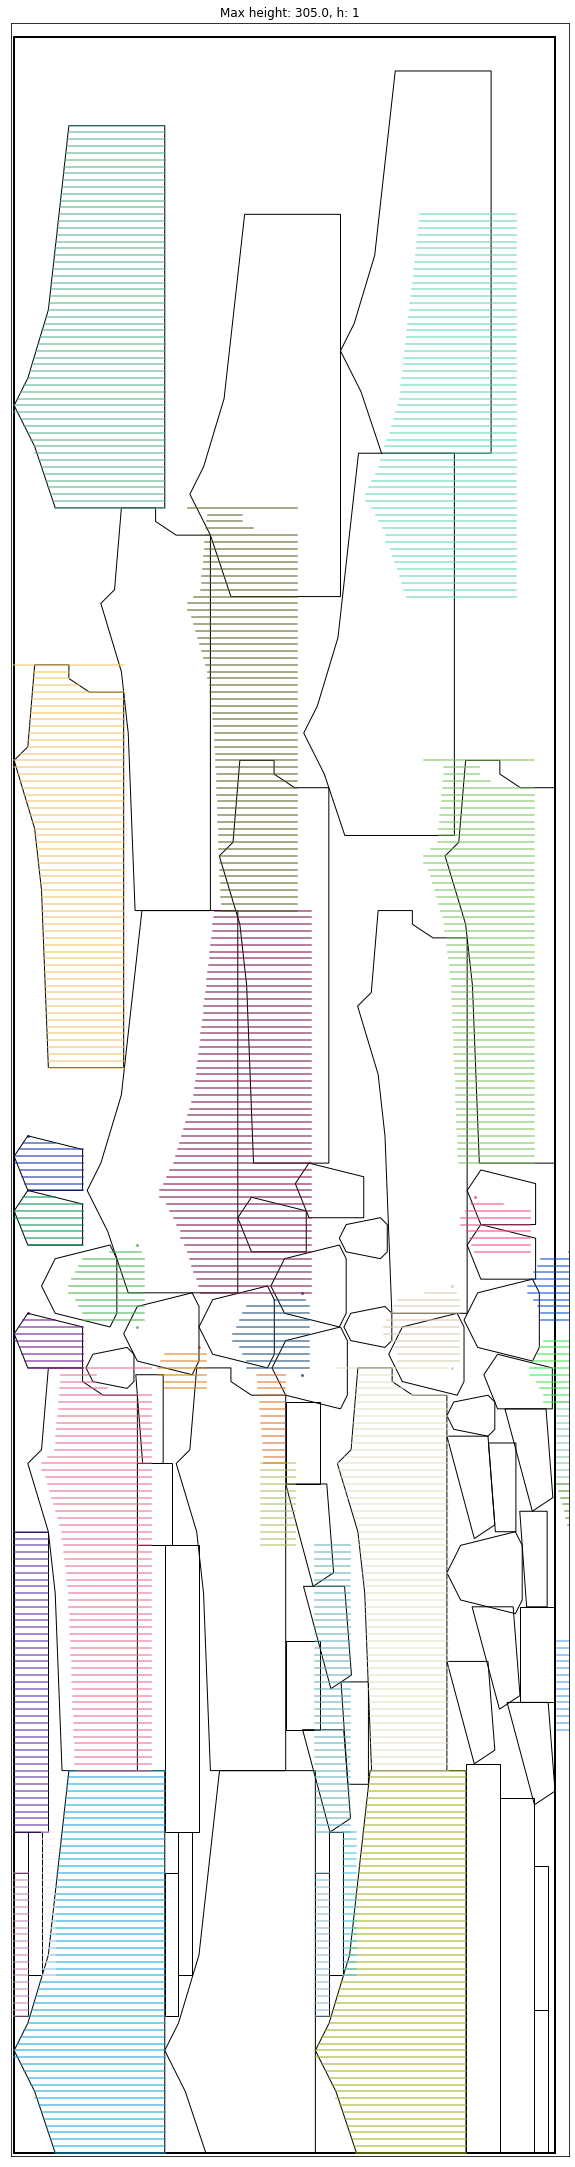

In [23]:
# packing.draw_segments_packing()
from src.class_vector import Vector
import random
from matplotlib import pyplot as plt, patches

def draw_pallet (width, height, packing):
    packing = packing
    pallet_width = width
    pallet_height = height

    fig, ax = plt.subplots()
    # pallet_height = 350
    MAX_SIZE = 10
    if pallet_width > pallet_height:
        fig.set_figheight(MAX_SIZE)
        fig.set_figwidth(
            MAX_SIZE * pallet_width/pallet_height)
    else:
        fig.set_figheight(
            MAX_SIZE * pallet_height/pallet_width)
        fig.set_figwidth(MAX_SIZE)

    pallet = patches.Rectangle((0, 0),
                                pallet_width,
                                pallet_height,
                                linewidth=2,
                                facecolor='none',
                                edgecolor='black')
    ax.add_patch(pallet)
    ax.set_xlim(-0.5, pallet_width + 2)
    ax.set_ylim(-0.5, pallet_height + 2)

    # for i in range(int(pallet_height/h)):
    #     plt.plot([0, pallet_width], [i*h, i*h], linestyle = 'dotted', color = 'black')

    # h = 5
    max_height = 0

    for polygon in packing.items:
        rotated_points = copy.deepcopy(polygon.points)
        new_points = Polygon(rotated_points)
        t_vec = copy.deepcopy(polygon.t_vector)
        t_v = Vector(t_vec[0], t_vec[1]*h)
        new_points.move_to(t_v)
        rotated_points = new_points.points_to_list()
        for r_point in rotated_points:
            if r_point[1] > max_height:
                        max_height = copy.deepcopy(r_point[1])

        figure = patches.Polygon(rotated_points,
                                linewidth=1,
                                edgecolor='black',
                                fill=False)
        ax.add_patch(figure)
        random_color = "#" + \
                        ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
        # print(rot)
        for i in range(len(polygon.segments[polygon.best_rotation])):
            for sigment in polygon.segments[polygon.best_rotation][i]:
                sigment[0]+=polygon.t_vector[0]
                sigment[1]+=polygon.t_vector[0]
                if sigment[0] != sigment[1]:
                    plt.plot(sigment, [(i+polygon.t_vector[1])*h, (i+polygon.t_vector[1])*h], color = random_color, alpha=0.7)
                else:
                    ax.scatter(sigment[0], (i+polygon.t_vector[1])*h, color = random_color, s = 4, alpha=0.7)
    plt.xticks([])
    plt.yticks([])
    plt.title('Max height: ' + str(max_height) + ', h: ' + str(packing.h))
    plt.savefig('packing_ff.png')
    plt.show()


draw_pallet(width, 310, packing)
